In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

x_train = []
y_train = []
z_train = []
h_train = []
x_test = []
y_test = []
z_test = []
h_test = []


with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        x_train.append(i[0])
        y_train.append(i[1])
        z_train.append(i[2])
        h_train.append(i[3])
        ct += 1
x_train = np.array(x_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)
z_train = np.array(z_train, dtype=np.float64)
h_train = np.array(h_train, dtype=np.float64)

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        x_test.append(i[0])
        y_test.append(i[1])
        z_test.append(i[2])
        h_test.append(i[3])
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1

x_test = np.array(x_test, dtype=np.float64)
y_test = np.array(y_test, dtype=np.float64)
z_test = np.array(z_test, dtype=np.float64)
h_test = np.array(h_test, dtype=np.float64)


In [2]:
def Obj_f(theta0,theta1,theta2,theta3, x, y, z, h, m):
    total_arr = theta0 + theta1*x + theta2*y + theta3*z - h
    total_arr = total_arr*total_arr
    tmp = np.sum(total_arr)
    return tmp/(2.0*m)


def gradient_theta0(theta0,theta1,theta2,theta3, x, y, z, h):
    fx = theta0 + theta1*x + theta2*y + theta3*z - h
    total = np.sum(fx)
    return total
    
    

def gradient_theta1(theta0,theta1,theta2,theta3, x, y, z, h):
    fx = (theta0 + theta1*x + theta2*y + theta3*z - h)*x
    total = np.sum(fx)
    return total
    
    

def gradient_theta2(theta0,theta1,theta2,theta3, x, y, z, h):
    fx = (theta0 + theta1*x + theta2*y + theta3*z - h)*y
    total = np.sum(fx)
    return total
    
    
def gradient_theta3(theta0,theta1,theta2,theta3, x, y, z, h):
    fx = (theta0 + theta1*x + theta2*y + theta3*z - h)*z
    total = np.sum(fx)
    return total
    

In [3]:

step = 0.00001
theta0 = 1
theta1 = 1
theta2 = 1
theta3 = 1
m = x_train.size
theta0_list = []
theta1_list = []
theta2_list = []
theta3_list = []
loss_count = []
loss_amount = []
enough = False
threshold = 104
loss=0
count = 0
while(enough == False):
    
    theta0_list.append(theta0)
    theta1_list.append(theta1)
    theta2_list.append(theta2)
    theta3_list.append(theta3)
    loss_count.append(count)
    loss = Obj_f(theta0,theta1,theta2,theta3, x_train, y_train, z_train, h_train, m)
    loss_amount.append(loss)
    if(loss < threshold):
        enough = True
    else:
        count = count + 1
        theta0 = theta0 - step*gradient_theta0(theta0,theta1,theta2,theta3, x_train, y_train, z_train, h_train)/m
        theta1 = theta1 - step*gradient_theta1(theta0,theta1,theta2,theta3, x_train, y_train, z_train, h_train)/m
        theta2 = theta2 - step*gradient_theta2(theta0,theta1,theta2,theta3, x_train, y_train, z_train, h_train)/m
        theta3 = theta3 - step*gradient_theta3(theta0,theta1,theta2,theta3, x_train, y_train, z_train, h_train)/m
        



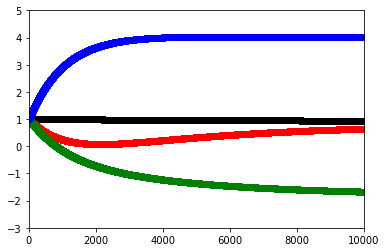

In [4]:
plt.scatter(loss_count, theta0_list, c='black')
plt.scatter(loss_count, theta1_list, c='red')
plt.scatter(loss_count, theta2_list, c='green')
plt.scatter(loss_count, theta3_list, c='blue')
plt.axis([0,10000,-3, 5])
plt.show()

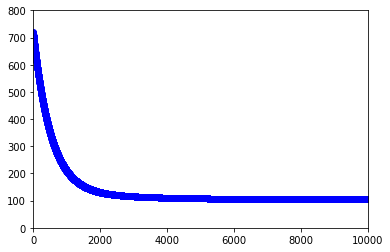

In [5]:
plt.scatter(loss_count, loss_amount, c='blue')
plt.axis([0,10000, 0,800])
plt.show()

In [6]:

step = 0.00001
theta0 = 1
theta1 = 1
theta2 = 1
theta3 = 1
m = x_test.size
theta0_list = []
theta1_list = []
theta2_list = []
theta3_list = []
loss_count = []
losst_amount = []
enough = False
threshold = 50
loss=0
count = 0
while(enough == False):
    
    theta0_list.append(theta0)
    theta1_list.append(theta1)
    theta2_list.append(theta2)
    theta3_list.append(theta3)
    loss_count.append(count)
    loss = Obj_f(theta0,theta1,theta2,theta3, x_test, y_test, z_test, h_test, m)
    losst_amount.append(loss)
    if(loss < threshold):
        enough = True
    else:
        count = count + 1
        theta0 = theta0 - step*gradient_theta0(theta0,theta1,theta2,theta3, x_test, y_test, z_test, h_test)/m
        theta1 = theta1 - step*gradient_theta1(theta0,theta1,theta2,theta3, x_test, y_test, z_test, h_test)/m
        theta2 = theta2 - step*gradient_theta2(theta0,theta1,theta2,theta3, x_test, y_test, z_test, h_test)/m
        theta3 = theta3 - step*gradient_theta3(theta0,theta1,theta2,theta3, x_test, y_test, z_test, h_test)/m
        


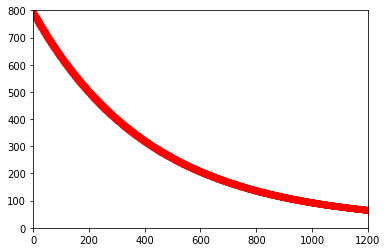

In [7]:
plt.scatter(loss_count, losst_amount, c='red')
plt.axis([0,1200, 0,800])
plt.show()